In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
##when a plotting command is executed, the resulting plot appears immediately below the code cell that generated it, rather than in a separate window.
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight(DATASET).csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

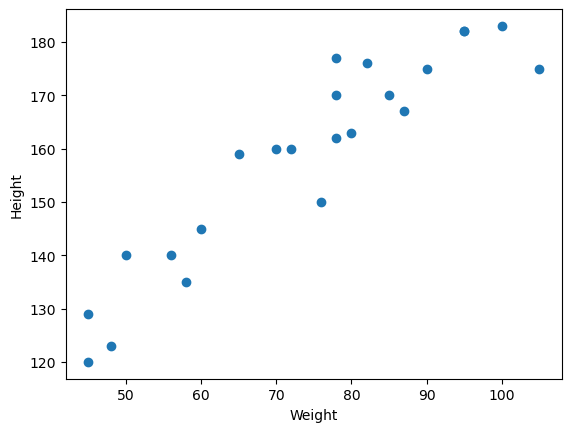

In [5]:
##Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [6]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


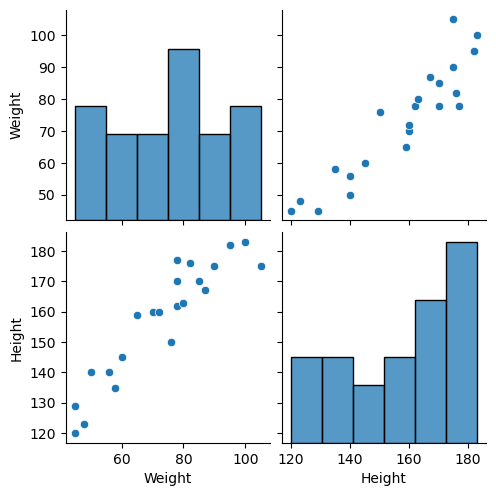

In [7]:
## Seaborn for visualization.
## a pairplot shows pairwise relationships between variables in a dataset by creating a matrix of scatterplots. 
# It also includes histograms along the diagonal, showing the distribution of each individual variable.
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='Weight', ylabel='Count'>

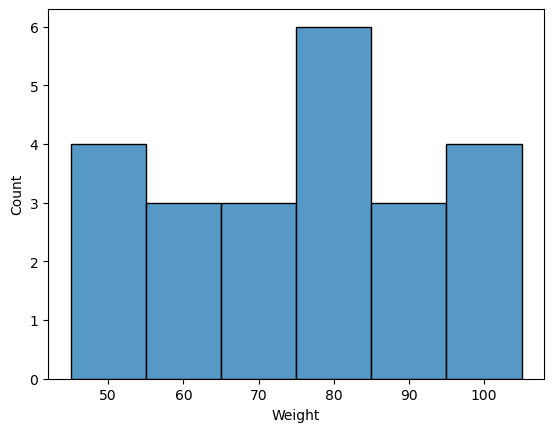

In [8]:
sns.histplot(df['Weight'])  ## gives a histogram as an output

In [9]:
X_series=df['Weight']
print(X_series)
print(type(df))
print(type(X_series))
np.array(X_series).shape  ## shows the size

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


(23,)

In [10]:
Y_dataframe=df[['Weight']]  ## Independent features should be data frame or 2-D array
print(Y_dataframe)
print(type(Y_dataframe))
np.array(Y_dataframe).shape

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72
<class 'pandas.core.frame.DataFrame'>


(23, 1)

In [11]:
Z=df['Height'] ## dependent feature - this variable can be in series or 1d array
np.array(Z).shape

(23,)

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [13]:
## random_state essentially seeds the random number generator, ensuring that if you use the same random_state value, 
# you'll get the same split every time, making your results reproducible. 
X_train,X_Test,y_train,y_test=train_test_split(Y_dataframe,Z,test_size=0.25,random_state=42)

In [14]:
print(y_train)
print(" ")
print(y_test)

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64
 
15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64


In [15]:
## fit:- the mean and standard deviation for scaling, or other model-specific parameters.
# transform:- standardization

In [16]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [17]:
X_Test=scaler.transform(X_Test)  ## Here, the transform will use the previously determined mean and standard deviation to standardize the data.
X_Test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [18]:
## apply linear regression
from sklearn.linear_model import LinearRegression

In [19]:
regression=LinearRegression()
u=regression.fit(X_train,y_train)

In [20]:
print("Coefficient or Slope:",regression.coef_)

Coefficient or Slope: [17.2982057]


In [21]:
print("Intercept:",u.intercept_)

Intercept: 156.47058823529412


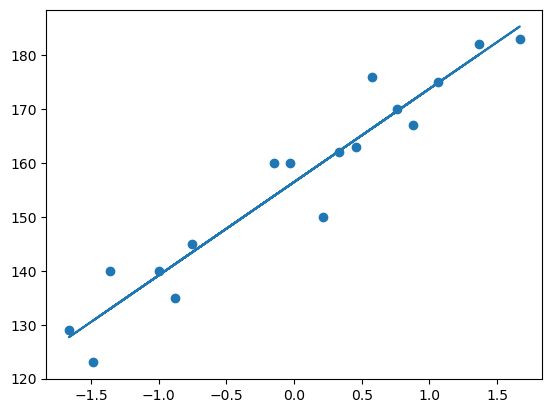

In [22]:
## plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train)) ## used to plot the best fit line


### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.4705 + 17.29(X_test)

In [23]:
## prediction for test data
y_pred=regression.predict(X_Test)
print(y_pred)  ## gives all the y-axis values

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [24]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse=mean_squared_error(y_test,y_pred)  ## y_test is the actual value of x_test and y_pred is the predicted values by model of x_test
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse,mae,rmse)

114.84069295228699 9.665125886795005 10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [26]:
from sklearn.metrics import r2_score

In [27]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [28]:
# display adjusted R-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_Test.shape[1]-1)

0.6701033397476595

In [32]:
X_Test.shape[1]

1

In [33]:
regression.predict(scaler.transform([[75]]))

c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([159.12122213])

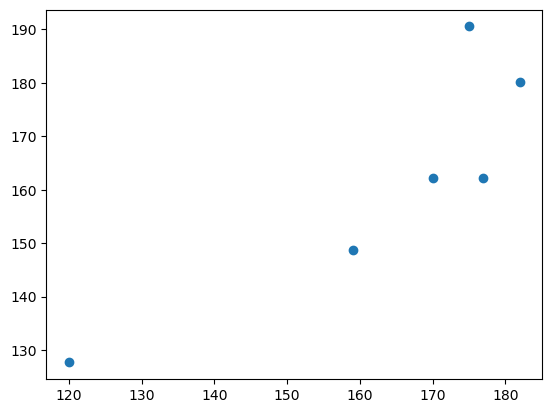

In [34]:
## assumptions
## Scatter plot
plt.scatter(y_test,y_pred)

In [35]:
## Residuals
residuals=y_test-y_pred

residuals


15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

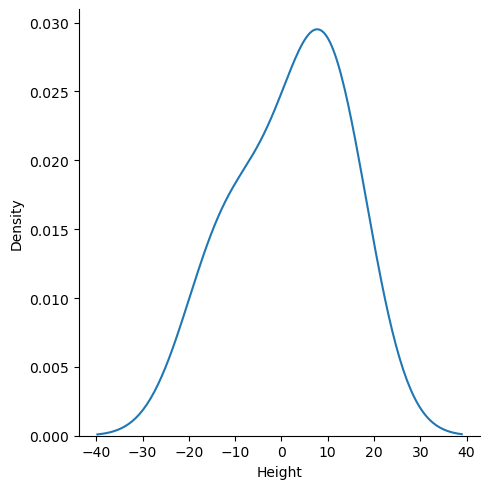

In [36]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")

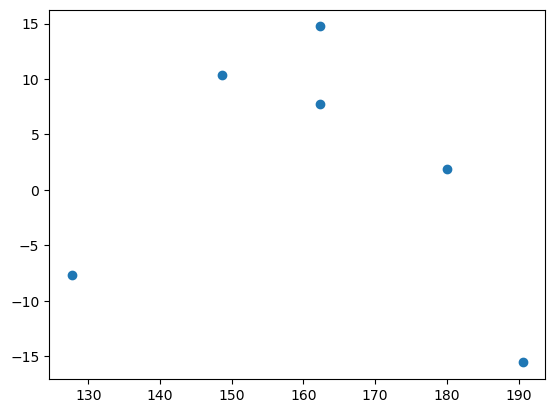

In [37]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)

# OLS

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.OLS(y_train,X_train).fit()

In [40]:
prediction=model.predict(X_Test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [227]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 13 May 2025   Prob (F-statistic):                       0.664
Time:                        01:23:32   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [228]:
regression.predict(scaler.transform([[72]]))

c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])